In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
import os
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt
warnings.filterwarnings('ignore')

# Анализ пользовательской базы Amazon Prime

Набор данных Amazon Prime Users содержит информацию о 2500 вымышленных пользователях сервиса подписки Amazon Prime. Каждая запись в наборе данных содержит такие сведения, как имя пользователя, адрес электронной почты, местоположение, план подписки, информация об оплате и показатели вовлеченности. Кроме того, предоставляются демографические данные, такие как пол и дата рождения, а также предпочтения пользователей, такие как любимые жанры и устройства, используемые для доступа к платформе.

Имеются следующие столбцы:

__User ID__ = Уникальный идентификатор пользователя

__Name__ = ФИО пользователя

__Email Address__ = Почта пользователя

__Username__ = Ник пользователя в сервисе

__Date of Birth__ = Дата рождения

__Gender__ = Пол

__Location__ = Расположение

__Membership Start Date__ = Дата начала подписки

__Membership End Date__ = Дата окончания подписки

__Subscription Plan__ = Вид подписки (месячная/ежегодная)

__Payment Information__ = Информация о платежной системе

__Renewal Status__ = Способ продления подписки (авто/ручной)

__Usage Frequency__ = Частота использования сервиса

__Purchase History__ = История покупок

__Favorite Genres__ = Любимые жанры

__Devices Used__ = Использованные устройства

__Engagement Metrics__ = Оценка вовлеченности пользователя

__Feedback/Ratings__ = Оценка от пользователя (от 1 до 5)

__Customer Support Interactions__ = Степень взаимодействия пользователя со службой поддержки

## Предобработка данных

In [241]:
# Импортируем наш датасет и сразу приведем необходимые колонки с датой к соответствующему типу данных
os.listdir("C:/Users/Albert/jupyter_notebook/My Projects/Amazon_Prime")

amazon = pd.read_csv('amazon_prime_users.csv')
amazon.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [242]:
amazon['Date of Birth'] = pd.to_datetime(amazon['Date of Birth'])
amazon['Membership Start Date'] = pd.to_datetime(amazon['Membership Start Date'])
amazon['Membership End Date'] = pd.to_datetime(amazon['Membership End Date'])

In [243]:
# Бегло взглянем на наш датасет
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   User ID                        2500 non-null   int64         
 1   Name                           2500 non-null   object        
 2   Email Address                  2500 non-null   object        
 3   Username                       2500 non-null   object        
 4   Date of Birth                  2500 non-null   datetime64[ns]
 5   Gender                         2500 non-null   object        
 6   Location                       2500 non-null   object        
 7   Membership Start Date          2500 non-null   datetime64[ns]
 8   Membership End Date            2500 non-null   datetime64[ns]
 9   Subscription Plan              2500 non-null   object        
 10  Payment Information            2500 non-null   object        
 11  Renewal Status   

In [244]:
# Проверим на зачения NaN
amazon.isna().sum()

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64

In [245]:
# Уберем пробелы и сделаем заголовки колонок прописными буквами для удобства

amazon.columns = amazon.columns.str.lower().str.replace(' ', '_')
amazon.head()

,user_id,name,email_address,username,date_of_birth,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [246]:
# Удалим колонки name, email_address, username

amazon = amazon.drop(columns=['name', 'email_address', 'username'])

In [247]:
amazon

,user_id,date_of_birth,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [248]:
# Добавим колонку с годом рождения пользователя для дальнейшего удобства
amazon.insert(loc=2, column='year_of_birth', value=amazon.date_of_birth.dt.year)

In [249]:
# Добавим колонку с числом лет пользователя
amazon.insert(loc=3, column='age', value=None)

In [250]:
# Посчитаем возраст каждого пользователя и переведем колонку в формат int8
today_date = dt.today()
for i in range(len(amazon)):
     amazon.loc[i, 'age'] = relativedelta(today_date, amazon.loc[i, 'date_of_birth']).years
amazon['age'] = amazon['age'].astype('int8')

In [251]:
amazon

,user_id,date_of_birth,year_of_birth,age,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,1953,71,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,1978,45,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,1994,29,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,1964,59,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,1961,63,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,1967,56,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,1980,43,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,1972,52,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,1965,58,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


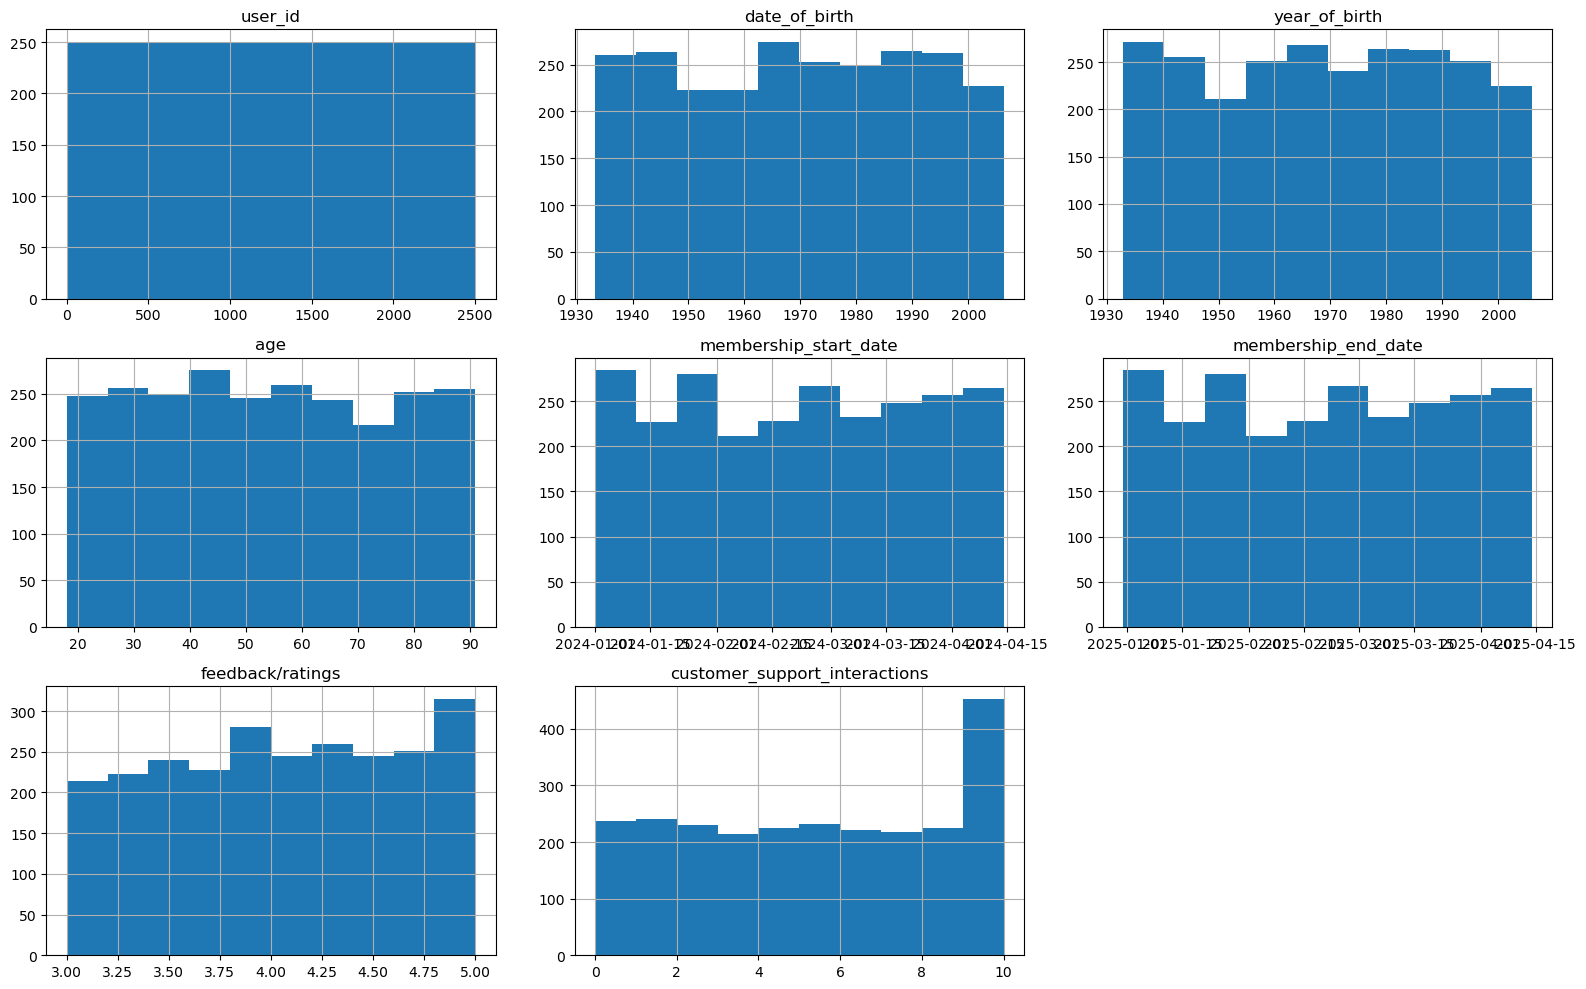

In [252]:
# Построим первые графики для визуального ознакомления с датасетом

amazon.hist(bins=10, figsize=(16,10))
plt.tight_layout()

## Анализ и визуализация данных

In [253]:
# Взглянем еще раз на наш датасет
amazon

,user_id,date_of_birth,year_of_birth,age,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,1953,71,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,1978,45,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,1994,29,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,1964,59,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,1961,63,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,1967,56,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,1980,43,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,1972,52,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,1965,58,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


### Общие расчеты

Начнем с изучения того, как наши данные распределены

In [254]:
amazon.nunique()

user_id                          2500
date_of_birth                    2384
year_of_birth                      74
age                                74
gender                              2
location                         2265
membership_start_date             105
membership_end_date               105
subscription_plan                   2
payment_information                 3
renewal_status                      2
usage_frequency                     3
purchase_history                    3
favorite_genres                     7
devices_used                        3
engagement_metrics                  3
feedback/ratings                   21
customer_support_interactions      11
dtype: int64

In [255]:
# Посмотрим, как с течением времени распределялось количество новых подписок
membership_count_by_date = amazon.groupby('membership_start_date', as_index=False).size().rename(columns={'size':'memberships_count'})
membership_count_by_date

,membership_start_date,memberships_count
0,2024-01-01,27
1,2024-01-02,22
2,2024-01-03,37
3,2024-01-04,15
4,2024-01-05,26
...,...,...
100,2024-04-10,23
101,2024-04-11,25
102,2024-04-12,31
103,2024-04-13,20


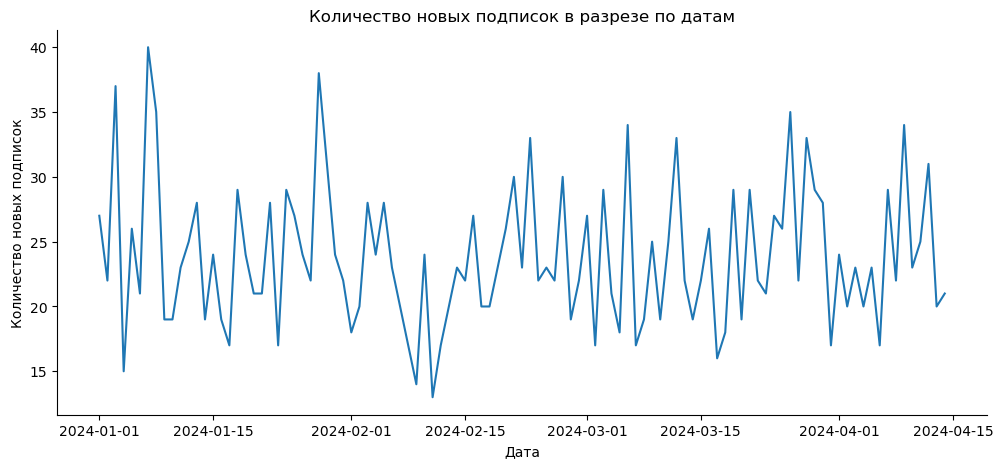

In [256]:
# Визуализируем полученную информацию
plt.figure(figsize=(12,5))
sns.lineplot(membership_count_by_date, x = 'membership_start_date', y = 'memberships_count')
plt.title('Количество новых подписок в разрезе по датам')
plt.xlabel('Дата')
plt.ylabel('Количество новых подписок')
sns.despine()

Можно заметить, что наибольший прирост подписок был замечен в первой половине января. Это объясняется сезонным фактором, когда во время праздников большинство людей отдыхали дома.

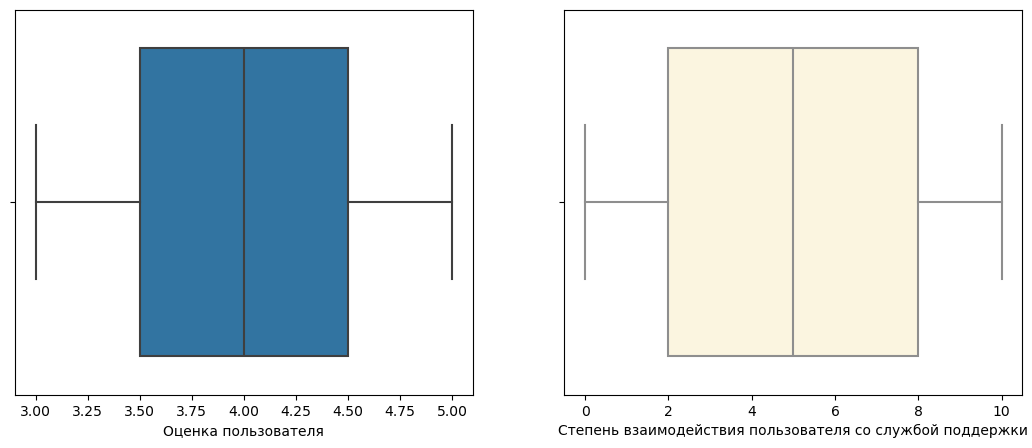

In [257]:
# Посмотрим, как у нас распределены рейтинги и степень взаимодействия пользователя со службой поддержки
fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.boxplot(amazon, x='feedback/ratings', ax=axs[0]).set(xlabel='Оценка пользователя')
sns.boxplot(amazon, x='customer_support_interactions', ax=axs[1], color='cornsilk').set(xlabel='Степень взаимодействия пользователя со службой поддержки')
plt.show()

Распределение обеих колонок является нормальным. Медианы со средними значениями практически идентичны: средняя оценка от пользователей составляет 4 балла, а степень взаимодействия со службой поддержки - 5 баллов.

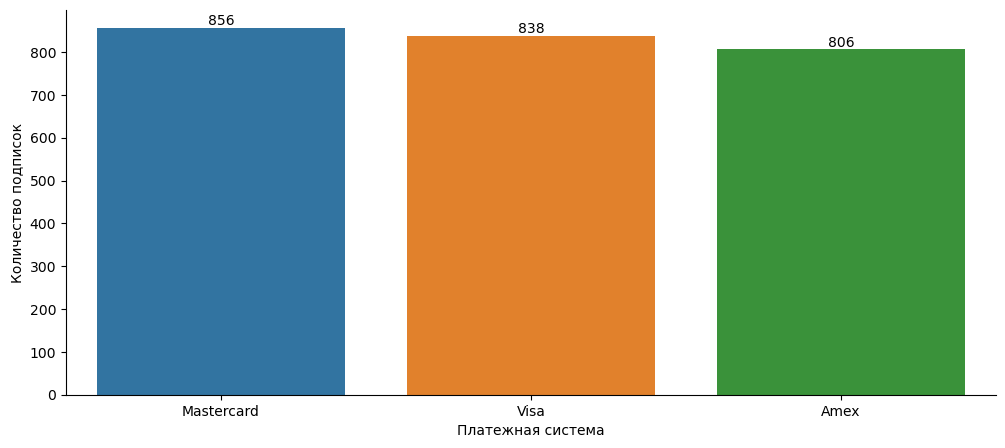

In [258]:
# Какая ситуация по платежным системам?
plt.figure(figsize=(12,5))
ax = sns.countplot(amazon, x='payment_information')
ax.bar_label(ax.containers[0])
plt.xlabel('Платежная система')
plt.ylabel('Количество подписок')
sns.despine()

Видно, что больше всего людей пользуются mastercard при оплате подписки, потом идет Visa и Amex

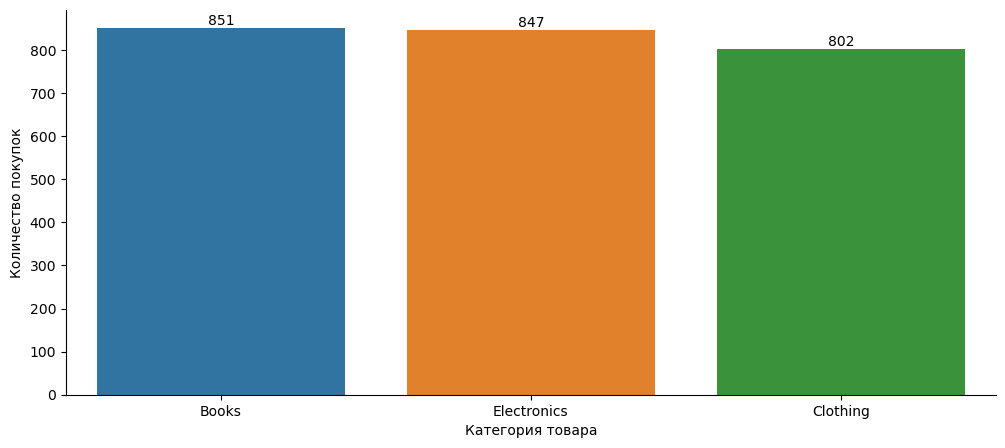

In [259]:
# Визуализируем, какие товары чаще всего покупают пользователи
plt.figure(figsize=(12, 5))
ax1 = sns.countplot(amazon, x='purchase_history', order = amazon['purchase_history'].value_counts().index)
ax1.bar_label(ax1.containers[0])
plt.xlabel('Категория товара')
plt.ylabel('Количество покупок')
sns.despine()

Чаще всего люди покупают книги, после чего идет электроника и одежда

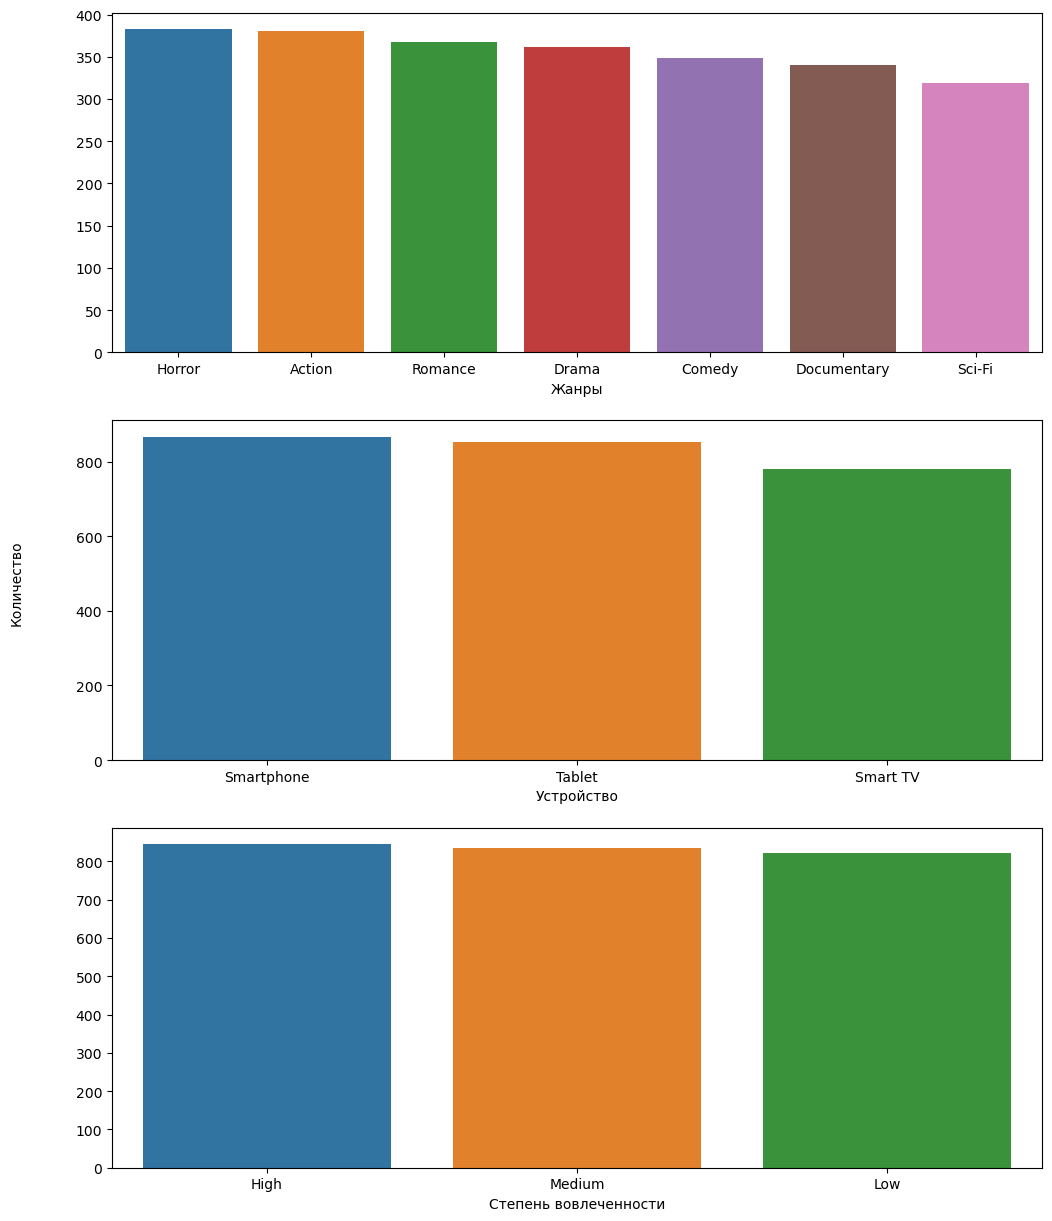

In [260]:
# Сделаем такие же графики для любимых жанров пользователей, использованных устройств и метрик вовлеченности
fig, axs = plt.subplots(3,1, figsize=(12,15))
fig.subplots_adjust(hspace=0.2)
sns.countplot(amazon, x='favorite_genres', ax=axs[0], order=amazon['favorite_genres'].value_counts().index).set(xlabel='Жанры', ylabel='')
sns.countplot(amazon, x='devices_used', ax=axs[1], order=amazon['devices_used'].value_counts().index).set(xlabel='Устройство', ylabel='')
sns.countplot(amazon, x='engagement_metrics', ax=axs[2], order=amazon['engagement_metrics'].value_counts().index).set(xlabel='Степень вовлеченности', ylabel='')
fig.text(0.04, 0.5, 'Количество', va='center', rotation='vertical')
plt.show()

Самым популярным жарном среди клиентов сервиса оказались ужасы, а самым непопулярным - научная фантастика. Очевидно, что больше всего клиентов пользуются сервисом через смартфон, а меньше всего - через умное телевидение. Степень вовлеченности распределена примерно одинаково между высоким, средним и низким значениями

In [261]:
# Проверим также, как связаны способ оплаты и продления подписки
renewal_and_payment = amazon.groupby('renewal_status', as_index=False)['payment_information'].value_counts()
renewal_and_payment

,renewal_status,payment_information,count
0,Auto-renew,Visa,448
1,Auto-renew,Mastercard,441
2,Auto-renew,Amex,385
3,Manual,Amex,421
4,Manual,Mastercard,415
5,Manual,Visa,390


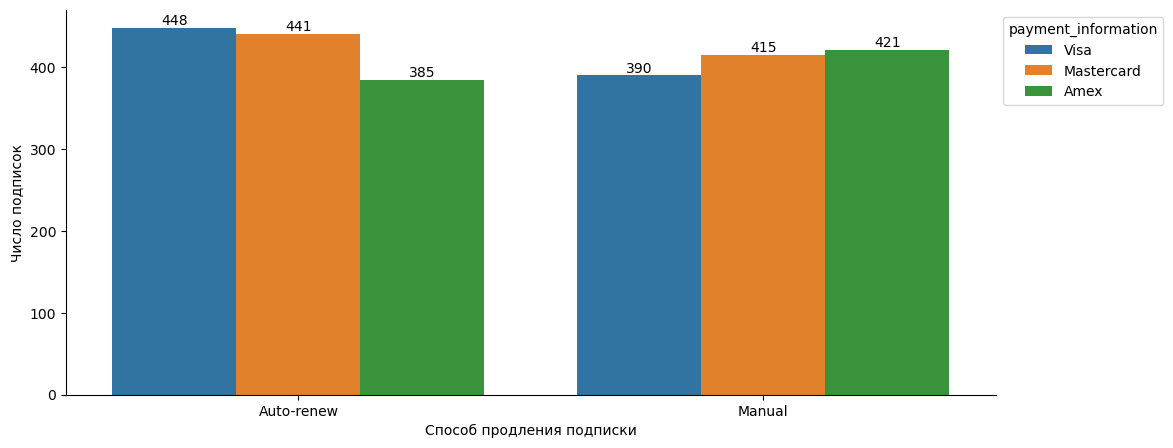

In [262]:
plt.figure(figsize=(12,5))
ax = sns.barplot(renewal_and_payment, x='renewal_status', y='count', hue='payment_information')
for i in ax.containers:
    ax.bar_label(i,)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Способ продления подписки')
plt.ylabel('Число подписок')
sns.despine()

На графике видно, что пользователи с автопродлением подписки предпочитают пользоваться картами Visa и Mastercard, тогда как у пользователей с ручным обновлением подписки ситуация отличается - они предпочитают карты Amex, а Visa используют меньше всего

### Проверка гипотез

In [263]:
amazon

,user_id,date_of_birth,year_of_birth,age,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,1953,71,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,1978,45,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,1994,29,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,1964,59,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,1961,63,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,1967,56,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,1980,43,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,1972,52,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,1965,58,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


#### Гипотеза 1. Пользователи в возрасте 40+ реже используют Amazon Prime в процентном соотношении, чем более молодые пользователи

In [264]:
# Сделаем функцию, которая будет разделять наших пользователей на две группы - до 40 и 40+
def age_groups(age):
    if age >= 40:
        return '40+'
    return 'До 40'

In [265]:
#Сделаем копию датафрейма и заменим в ней значения на соответствующие возрастные группы
amazon_age_groups = amazon
amazon_age_groups.age = amazon_age_groups.age.apply(lambda age: age_groups(age))
amazon_age_groups

,user_id,date_of_birth,year_of_birth,age,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,1953,40+,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,1978,40+,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,1994,До 40,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,1964,40+,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,1961,40+,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,1967,40+,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,1980,40+,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,1972,40+,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,1965,40+,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [266]:
#Сгруппируем наши данные по возрастным группам и частоте использования сервиса, и визуализируем полученные результаты
amazon_age_groups_grouped = amazon_age_groups.groupby('age')['usage_frequency'].value_counts(normalize=True).mul(100).round(2).unstack().sort_index(ascending=False)
amazon_age_groups_grouped

usage_frequency,Frequent,Occasional,Regular
age,,,
До 40,34.35,32.63,33.02
40+,33.91,32.99,33.10


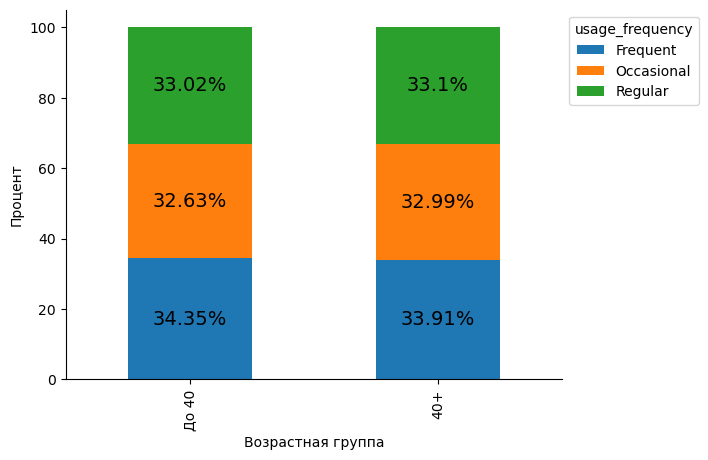

In [267]:
ax = amazon_age_groups_grouped.plot(kind='bar', stacked=True)
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Процент')
ax.set_xlabel('Возрастная группа')
sns.despine()

Гипотеза отвергается, поскольку старшее поколение немного чаще пользуется сервисом

#### Гипотеза 2. Пользователи со смартфонов наиболее вовлечены, чем пользователи с других устройств

In [268]:
# Для проверки этой гипотезы сгруппируем данные по типу устройства и результатам метрик вовлеченности
amazon_engagement_by_device = amazon.groupby('devices_used')['engagement_metrics'].value_counts(normalize=True).mul(100).round(2).unstack()
amazon_engagement_by_device = amazon_engagement_by_device.iloc[:,[0,2,1]]

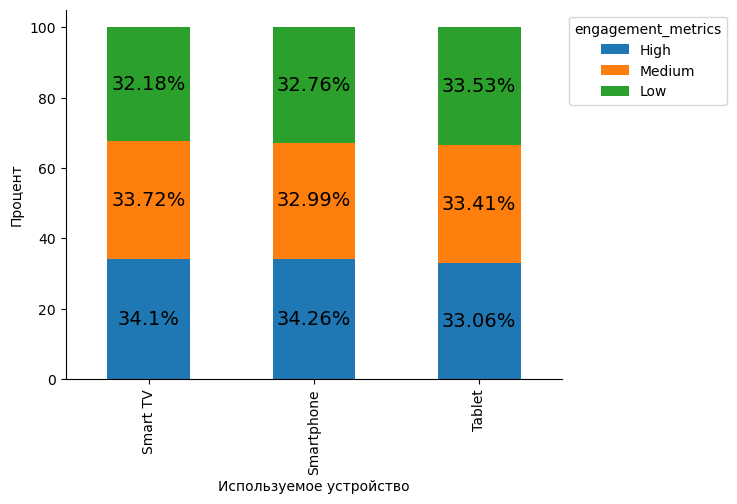

In [269]:
# Построим столбчатую диаграмму с накоплением
ax = amazon_engagement_by_device.plot(kind='bar', stacked=True)
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Процент')
ax.set_xlabel('Используемое устройство')
sns.despine()

Датасет был сделан слишком «идеальным», отчего многие данные распределены практически равномерно, поэтому если брать этот фактор в расчет, то вторая гипотеза подтверждается, поскольку процент пользователей с высокой вовлеченностью у смартфонов немного выше остальных девайсов

#### Гипотеза 3. Большее число пользователей до 40 лет предпочитают больше годовую подписку

In [270]:
# Для проверки этой гипотезы нам снова понадобятся возрастные группы, которые мы определяли ранее
#Теперь определим для возрастной группы до 40 лет количество подписок в разрезе по их видов


In [271]:
amazon_subscription_count = amazon_age_groups.loc[amazon_age_groups.age=='До 40'].groupby('subscription_plan', as_index=False).size()
amazon_subscription_count

,subscription_plan,size
0,Annual,406
1,Monthly,348


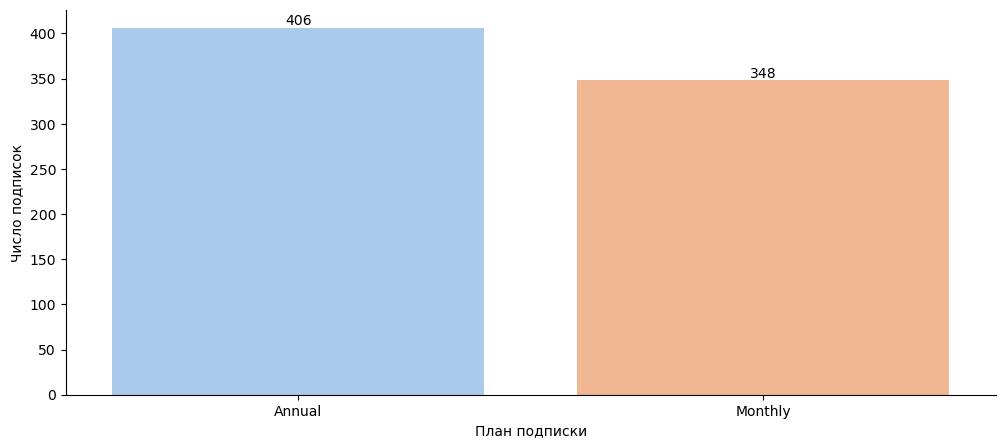

In [272]:
plt.figure(figsize=(12,5))
ax = sns.barplot(amazon_subscription_count, x='subscription_plan', y='size', palette='pastel')
plt.xlabel('План подписки')
plt.ylabel('Число подписок')
ax.bar_label(ax.containers[0])
sns.despine()

Гипотеза подтверждается, поскольку количество годовых подписок у пользователей до 40 лет превышает количество месячных подписок.

#### Гипотеза 4. Люди в возрасте 40+ чаще взаимодействуют с поддержкой

In [273]:
# Используем знакомый нам датасет с возрастными группами
amazon_age_groups

,user_id,date_of_birth,year_of_birth,age,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,devices_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,1953-06-03,1953,40+,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,1978-07-08,1978,40+,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,1994-12-06,1994,До 40,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,1964-12-22,1964,40+,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,1961-06-04,1961,40+,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1967-08-19,1967,40+,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,1980-10-23,1980,40+,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,1972-03-31,1972,40+,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,1965-08-02,1965,40+,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [274]:
# Посмотрим, как распределены данные взаимодействий с поддержкой по возрастным группам
amazon_age_groups.groupby('age')['customer_support_interactions'].describe().sort_index(ascending=False)

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
До 40,754.0,4.919098,3.158930,0.0,2.0,5.0,8.0,10.0
40+,1746.0,4.965636,3.206363,0.0,2.0,5.0,8.0,10.0


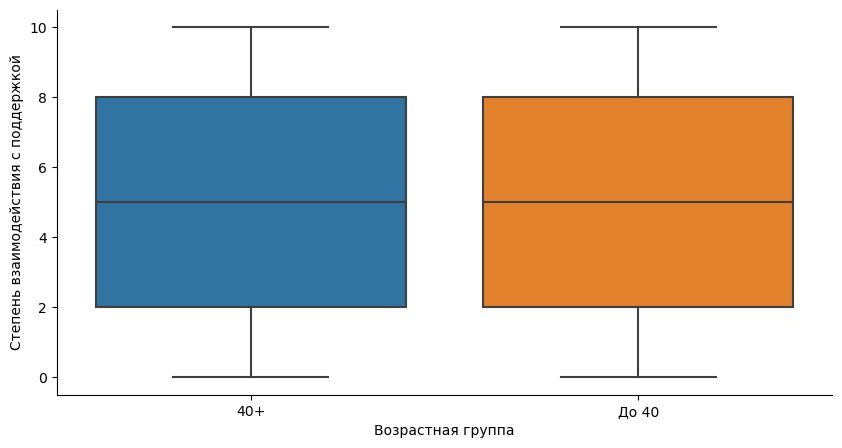

In [275]:
# Построим ящик с усами для двух возрастных групп
plt.figure(figsize=(10,5))
sns.boxplot(amazon_age_groups, x='age', y='customer_support_interactions')
plt.xlabel('Возрастная группа')
plt.ylabel('Степень взаимодействия с поддержкой')
sns.despine()

Гипотеза отвергается, поскольку средние и медианные значения степени взаимодействия с поддержкой у двух возрастных групп примерно равны

#### Гипотеза 5. Пользователи с регулярной частотой использования оставляют более высокие оценки

In [276]:
# Сгруппируем данные по частоте использования сервиса и проанализируем распределение оценок для каждой из них
amazon.groupby('usage_frequency')['feedback/ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
usage_frequency,,,,,,,,
Frequent,851.0,3.991774,0.578032,3.0,3.5,4.0,4.5,5.0
Occasional,822.0,3.999027,0.584596,3.0,3.5,4.0,4.5,5.0
Regular,827.0,4.023821,0.579973,3.0,3.5,4.0,4.5,5.0


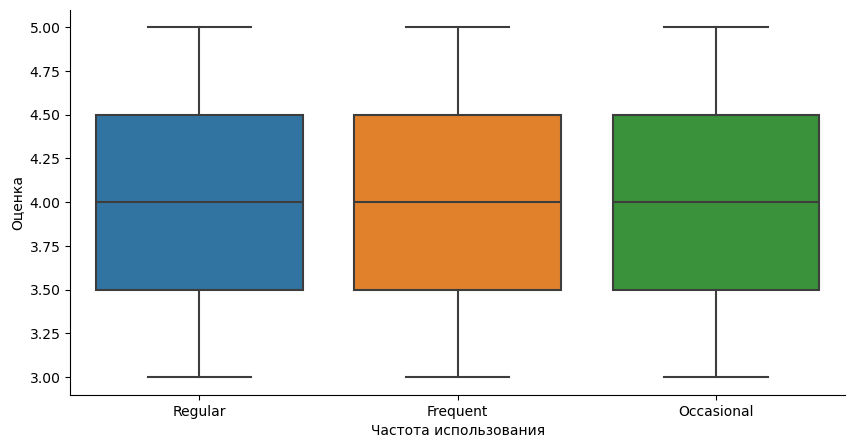

In [277]:
# Построим ящик с усами 
plt.figure(figsize=(10,5))
sns.boxplot(amazon, x='usage_frequency', y='feedback/ratings')
plt.xlabel('Частота использования')
plt.ylabel('Оценка')
sns.despine()

Гипотеза отвергается, поскольку оценки пользователей в зависимости от частоты использования сервиса практически не отличаются

# Заключение

<font size="3">Таким образом, было проведено исследование данных о вымышленных 2500 пользователях, их покупках, возрасте, вовлеченности и т.д. Не смотря на то, что сам датасет оказался не слишком интересным для изучения, поскольку данные в нем распределены максимально нормальным образом, была осуществлена работа по предобработке данных, анализе имеющейся информации и проверке гипотез, большинство из которых в итоге не подтвердилось. Инсайты, полученные в ходе анализа: </font>

<font size="3"> 1. В начале января 2024 года было оформлено наибольшее количество подписок за рассматриваемый период.</font>

<font size="3"> 2. Больше всего пользователи пользуются картами Mastercard. Однако, пользователи с автообновлением подписки предпочитают Visa, тогда как пользователи с ручным обновлением подписки - Amex.</font>

<font size="3"> 3. Чаще всего пользователи покупают книги, а уже потом электронику и одежду.</font>

<font size="3"> 4. У возрастных групп до 40 и после 40 лет не наблюдается особой разницы в частоте использования сервиса.</font>

<font size="3"> 5. Пользователи со смартфонами имеют немного более высокие показатели вовлеченности, чем пользователи с других устройств.</font>

<font size="3"> 6. Пользователи до 40 лет предпочитают больше годовую подписку.</font>

<font size="3"> 7. Заметные различия в оценках и степени взаимодействия с поддержкой у пользователей до 40 и более 40 лет не наблюдается.</font>